In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def load_data(filename):
    data = pd.read_csv(filename)
    X = data.iloc[:, :-1].values
    y = np.where(data.iloc[:, -1] == 'Positive', 1, 0)
    return X, y

def my_perceptron(X, y, threshold=0.01, max_iter=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    misclassified = True
    iteration = 0
    
    # print(weights)

    while misclassified and iteration < max_iter:
        misclassified = False
        for i in range(n_samples):
            if np.dot(X[i], weights) + bias <= 0:
                weights += X[i] * y[i]
                bias += y[i]
                misclassified = True
        iteration += 1
        # print(X[i] , " -> " , weights)

    # print(weights)
    return weights, bias

def plot_separator(X, y, weights, bias):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot data points
    positive_indices = (y == 1)
    negative_indices = (y == 0)
    ax.scatter(X[positive_indices][:,0], X[positive_indices][:,1], X[positive_indices][:,2], c='b', label='Positive')
    ax.scatter(X[negative_indices][:,0], X[negative_indices][:,1], X[negative_indices][:,2], c='r', label='Negative')

    # Plot separator
    xx, yy = np.meshgrid(range(-2, 3), range(-2, 3))
    zz = (-weights[0] * xx - weights[1] * yy - bias) / weights[2]
    ax.plot_surface(xx, yy, zz, alpha=0.5)

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.legend()
    plt.show()

if __name__ == "__main__":
    # Load data
    X, y = load_data('lab02_dataset_1.csv')

    # print(y)
    # X = np.array([[1, 2], [2, 3], [2, 1], [3, 0]])
    # y = np.array([1, 1, 0, 0])

    X = np.array([[1, 2, 1] , [1, -2, 1] , [3, 1, 2], [2, 3, 2] , [-1, 2, -2] , [-1, -2, 4] , [1, -3, -3] , [-2, 4, -2] , [4, 1, 3] , [-1, 2, -4]])
    y = np.array([1,0,0,1,1,0,0,1,0,1])

    # Apply perceptron algorithm
    weights, bias = my_perceptron(X, y)
    print(weights)
    print(bias)
    # Plot dataset and separator
    # plot_separator(X, y, weights, bias)


[ 0.  4. -3.]
2


In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
import matplotlib.pyplot as plt

# Assuming you have your data loaded into a DataFrame called 'data'
data = pd.read_excel('lab02_dataset_2.xlsx', engine='openpyxl')

# Dropping missing values
data_complete = data.dropna()

# Extracting features and target variable
X = data_complete[['OCCUPATION', 'EDUCATION', 'CAR_TYPE']]
y = data_complete['CAR_USE']

# Converting categorical variables to numerical using label encoding
X_encoded = pd.get_dummies(X)

# Splitting the data into train and test sets (assuming you have test data)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Calculate feature counts
feature_counts = np.array([np.bincount(X_train[c]) for c in X_train.columns])

# Training Naive Bayes model with Laplace smoothing of 0.01
naive_bayes_model = CategoricalNB(alpha=0.01)
naive_bayes_model.fit(X_train, y_train)

# 1. Output Class counts and Probabilities P(Yj)
class_counts = naive_bayes_model.class_count_
class_probabilities = class_counts / np.sum(class_counts)

print("Class counts:", class_counts)
print("Probabilities P(Yj):", class_probabilities)

# 2. Output P(Xi|Yj) along with their counts
# Calculate feature probabilities
feature_probabilities = (feature_counts.T / class_counts).T

print("Feature Counts (P(Xi|Yj)):")
print(pd.DataFrame(feature_counts, columns=X_encoded.columns))
print("Feature Probabilities (P(Xi|Yj)):")
print(pd.DataFrame(feature_probabilities, columns=X_encoded.columns))

# 3. Predict probabilities for the test cases
test_case_1 = [[0, 1, 0]]  # [Blue Collar, PhD, SUV]
test_case_2 = [[2, 0, 1]]  # [Manager, Below High School, Sports Car]

probabilities_test_case_1 = naive_bayes_model.predict_proba(test_case_1)
probabilities_test_case_2 = naive_bayes_model.predict_proba(test_case_2)

print("Car Usage probabilities for Test Case 1:", probabilities_test_case_1)
print("Car Usage probabilities for Test Case 2:", probabilities_test_case_2)

# 4. Generate histogram of predicted probabilities of CAR_USE = Private
predicted_probabilities_private = naive_bayes_model.predict_proba(X_test)[:, 1]
plt.hist(predicted_probabilities_private, bins=np.arange(0, 1.05, 0.05), density=True)
plt.xlabel('Predicted Probability of CAR_USE = Private')
plt.ylabel('Proportion of Observations')
plt.title('Histogram of Predicted Probabilities')
plt.show()

# 5. Calculate misclassification rate
misclassification_rate = 1 - naive_bayes_model.score(X_test, y_test)
print("Misclassification rate:", misclassification_rate)


Class counts: [1641. 2931.]
Probabilities P(Yj): [0.35892388 0.64107612]


ValueError: operands could not be broadcast together with shapes (2,20) (2,) 

[ 0.  4. -3.]


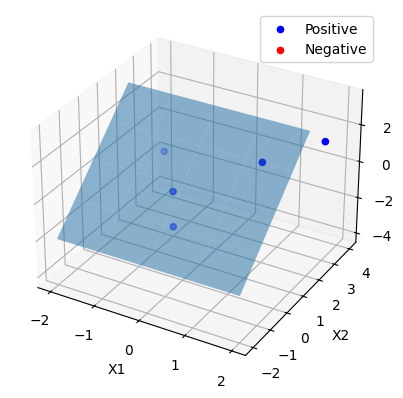

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def load_data(filename):
    data = pd.read_csv(filename)
    X = data.iloc[:, :-1].values
    y = np.where(data.iloc[:, -1] == 'Positive', 1, -1)
    return X, y

def my_perceptron(X, y, threshold=0.01, max_iter=10):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    misclassified = True
    iteration = 0

    while misclassified and iteration < max_iter:
        misclassified = False
        for i in range(n_samples):
            if np.dot(X[i], weights) + bias <= 0:
                weights += X[i] * y[i]
                bias += y[i]
                misclassified = True
        iteration += 1

    return weights, bias

def plot_separator(X, y, weights, bias):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot data points
    positive_indices = (y == 1)
    negative_indices = (y == -1)
    ax.scatter(X[positive_indices][:,0], X[positive_indices][:,1], X[positive_indices][:,2], c='b', label='Positive')
    ax.scatter(X[negative_indices][:,0], X[negative_indices][:,1], X[negative_indices][:,2], c='r', label='Negative')

    # Plot separator
    xx, yy = np.meshgrid(range(-2, 3), range(-2, 3))
    zz = (-weights[0] * xx - weights[1] * yy - bias) / weights[2]
    ax.plot_surface(xx, yy, zz, alpha=0.5)

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.legend()
    plt.show()

if __name__ == "__main__":
    # Load data
    # X, y = load_data('lab02_dataset_1.csv')

    # X = np.array([[1, 2, 1], [3, 4, 4], [5, 6, 6], [7, 8, 8]])
    # y = np.array([1, -1, 1, -1])

    # X = np.array([[1, 2], [2, 3], [2, 1], [3, 0]])
    # y = np.array([1, 1, 0, 0])

    X = np.array([[1, 2, 1] ,[1, -2, 1] ,[3, 1, 2], [2, 3, 2] ,[-1, 2, -2] ,[-1, -2, 4] ,[1, -3, -3] ,[-2, 4, -2] ,[4, 1, 3] ,[-1, 2, -4]])
    y = np.array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1])
    
    # Apply perceptron algorithm
    weights, bias = my_perceptron(X, y)
    print(weights)
    # Plot dataset and separator
    plot_separator(X, y, weights, bias)


[-261.64427201 2762.67262315 1986.32461931]


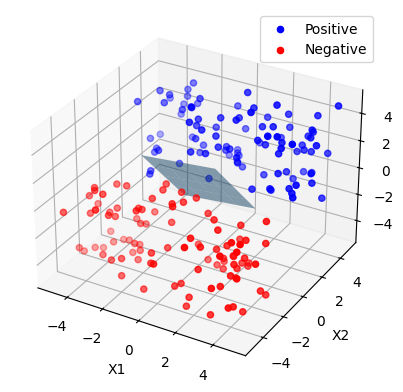

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def load_data(filename):
    data = pd.read_csv(filename)
    X = data.iloc[:, :-1].values
    y = np.where(data.iloc[:, -1] == 'Positive', 1, -1)
    return X, y

def my_perceptron(X, y, threshold=0.01, max_iter=10):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    misclassified = True
    iteration = 0

    while misclassified and iteration < max_iter:
        misclassified = False
        for i in range(n_samples):
            if np.dot(X[i], weights) + bias <= 0:
                weights += X[i] * y[i]
                bias += y[i]
                misclassified = True
        iteration += 1

    return weights, bias

def plot_separator(X, y, weights, bias):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot data points
    positive_indices = (y == 1)
    negative_indices = (y == -1)
    ax.scatter(X[positive_indices][:,0], X[positive_indices][:,1], X[positive_indices][:,2], c='b', label='Positive')
    ax.scatter(X[negative_indices][:,0], X[negative_indices][:,1], X[negative_indices][:,2], c='r', label='Negative')

    # Plot separator
    xx, yy = np.meshgrid(range(-2, 3), range(-2, 3))
    zz = (-weights[0] * xx - weights[1] * yy - bias) / weights[2]
    ax.plot_surface(xx, yy, zz, alpha=0.5)

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.legend()
    plt.show()

if __name__ == "__main__":
    # Load data
    X, y = load_data('lab02_dataset_1.csv')
    
    # Apply perceptron algorithm
    weights, bias = my_perceptron(X, y)
    print(weights)
    # Plot dataset and separator
    plot_separator(X, y, weights, bias)
